# Task 6.


### RNN Task: Predict Gold Prices for Next Day, Week, and Month

### Objective
Use a Recurrent Neural Network (RNN) to predict gold prices for the next day, next week, and next month using the "Gold Price Prediction Dataset" from Kaggle.

### Steps

1. **Data Acquisition**
   - Import necessary libraries (pandas, numpy, TensorFlow/Keras, etc.).
   - Load the dataset: `gold_data = pd.read_csv('path_to_FINAL_USO.csv')`.

2. **Data Preprocessing**
   - Perform data cleaning and preprocessing.
   - Normalize the data if necessary.
   - Create appropriate time series sequences for RNN.

3. **Model Development**
   - Define an RNN model using Torch or Keras.
   - Split the data into training and testing sets.

4. **Training the Model**
   - Train the model on the training dataset.
   - Use time steps as per your prediction needs (next day, week, month).

5. **Model Evaluation**
   - Evaluate the model's performance on the test set.
   - Adjust model parameters and architecture as needed.

6. **Prediction**
   - Make predictions for the next day, week, and month.
   - Analyze the results and accuracy of predictions.

7. **Conclusion**
   - Document your findings.
   - Suggest potential improvements or further experiments.

## Dataset
Download from: [Kaggle - Gold Price Prediction Dataset](https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset?select=FINAL_USO.csv)




In [120]:
# Imports
import os
import pathlib
import logging
import zipfile
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
import torchmetrics
from torchinfo import summary
from tqdm import tqdm

In [121]:
# Path to data 
data_path = pathlib.Path('./data/gold_pred/FINAL_USO.csv')

# Device setup
device = "cuda" if torch.cuda.is_available() else "cpu"

In [122]:
# EDA
df = pd.read_csv(data_path, parse_dates=True)
df.Date = pd.to_datetime(df.Date)
df.dtypes

Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
                      ...      
USO_High                float64
USO_Low                 float64
USO_Close               float64
USO_Adj Close           float64
USO_Volume                int64
Length: 81, dtype: object

In [123]:
# Check missing values
df.isna().sum().any()

False

In [124]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1718 non-null   datetime64[ns]
 1   Open           1718 non-null   float64       
 2   High           1718 non-null   float64       
 3   Low            1718 non-null   float64       
 4   Close          1718 non-null   float64       
 5   Adj Close      1718 non-null   float64       
 6   Volume         1718 non-null   int64         
 7   SP_open        1718 non-null   float64       
 8   SP_high        1718 non-null   float64       
 9   SP_low         1718 non-null   float64       
 10  SP_close       1718 non-null   float64       
 11  SP_Ajclose     1718 non-null   float64       
 12  SP_volume      1718 non-null   int64         
 13  DJ_open        1718 non-null   float64       
 14  DJ_high        1718 non-null   float64       
 15  DJ_low         1718 n

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

<Figure size 1000x1000 with 0 Axes>

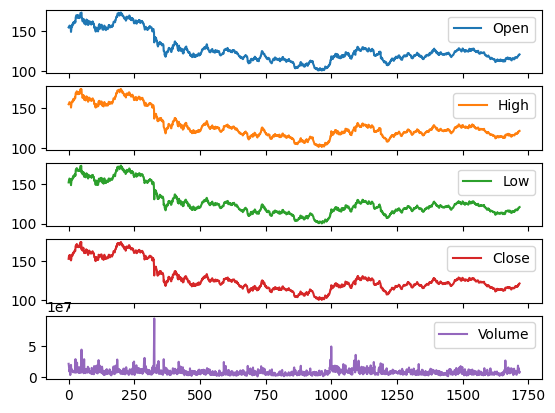

In [126]:
fig = plt.figure(figsize=(10, 10))
easy_df = df[["Open", "High", "Low", "Close", "Volume"]]
easy_df.plot(subplots=True)

In [127]:
# Hyperparametrs
time_frame_window_size = 3

# Preprocess data
dataset_len = len(df)
y = easy_df["Close"].to_list()
X = easy_df.drop(columns=["Close"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [128]:
# Create model
class GoldPricePredictor(nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
        super(GoldPricePredictor, self).__init__()
        self.rnn = nn.RNN(input_units, hidden_units, batch_first=True)
        self.fc = nn.Linear(hidden_units, output_units)
        
    def forward(self, x):
        x = x.squeeze(-1)
        return self.fc(self.rnn(x)[0])

In [129]:
# Instanciate our model
gp_model = GoldPricePredictor(4, 3, 1).to(device)
gp_model

GoldPricePredictor(
  (rnn): RNN(4, 3, batch_first=True)
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [130]:
# Setup loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(gp_model.parameters(), lr=0.5)

In [131]:
# Store our results
results = {"train_loss": [], "test_loss":[]}

In [132]:
# Model training
gp_model.train()
for epoch in range(120):
    X_train, y_train = X_train.to(device), y_train.to(device)
    logits = gp_model(X_train)
    loss = criterion(logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    results['train_loss'].append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')    

c:\Users\Sanya\kapitonnov_nn_n00b\neural_n00b\nn_n00b_env\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1374])) that is different to the input size (torch.Size([1374, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 12172.3301
Epoch [20/100], Loss: 8339.3975
Epoch [30/100], Loss: 5429.2925
Epoch [40/100], Loss: 3366.8867
Epoch [50/100], Loss: 2008.2795
Epoch [60/100], Loss: 1180.8077
Epoch [70/100], Loss: 718.1556
Epoch [80/100], Loss: 482.9161
Epoch [90/100], Loss: 375.5152
Epoch [100/100], Loss: 332.2947
Epoch [110/100], Loss: 317.4231
Epoch [120/100], Loss: 313.2958


In [133]:
# Model evaluating
gp_model.eval()
with torch.no_grad():
    X_test, y_test = X_test.to(device), y_test.to(device)
    logits = gp_model(X_test)
    loss = criterion(logits, y_test)
    print(f'Loss: {loss.item():.4f}')  

Loss: 287.5592


c:\Users\Sanya\kapitonnov_nn_n00b\neural_n00b\nn_n00b_env\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([344])) that is different to the input size (torch.Size([344, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


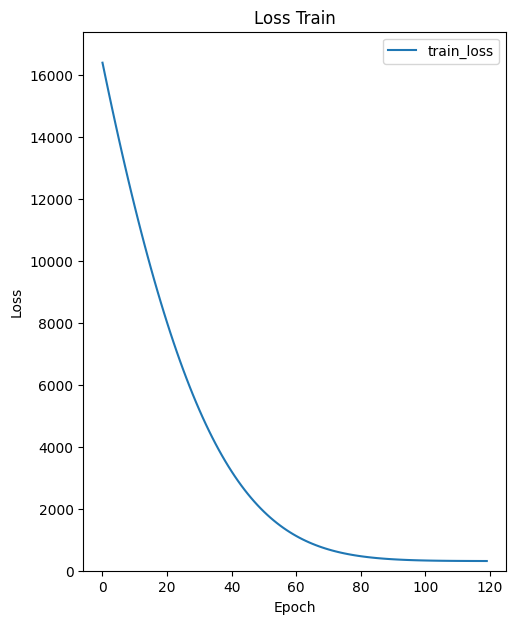

In [136]:
# Plot our results
fig = plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.plot(results["train_loss"], label="train_loss")
plt.title("Loss Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim([0, max(results["train_loss"])+1000])
plt.legend()